In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
books = pd.read_csv("../Datasets/Books.csv")
ratings = pd.read_csv("../Datasets/Ratings.csv")
users = pd.read_csv("../Datasets/Users.csv")

In [3]:
books = books.set_axis(["ISBN","Title","Author","Year","Publisher","Image_URL_S","Image_URL_M","Image_URL_L"], axis = "columns")
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Title        271360 non-null  object
 2   Author       271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image_URL_S  271360 non-null  object
 6   Image_URL_M  271360 non-null  object
 7   Image_URL_L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
print(books["Title"].nunique())
books["Title"].value_counts()

242135


Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                      

In [5]:
print(books["Publisher"].nunique())
books.Publisher.value_counts()[:15]

16807


Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Penguin USA                 2717
Harpercollins               2525
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2045
Name: count, dtype: int64

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [68]:
print(ratings["Book-Rating"].value_counts())
ratings[ratings["Book-Rating"]!=0]["Book-Rating"].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


Book-Rating
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [69]:
ratings = ratings[ratings["Book-Rating"] != 0]
ratings.groupby(by = "User-ID").count().sort_values(by = "ISBN", ascending = False).head(10)

,ISBN,Book-Rating
User-ID,,
11676,8524,8524
98391,5802,5802
153662,1969,1969
189835,1906,1906
23902,1395,1395
76499,1036,1036
171118,1035,1035
235105,1023,1023
16795,968,968


In [70]:
ratings.groupby(by = "User-ID").sum().sort_values(by = "Book-Rating", ascending = False).head(10)

,ISBN,Book-Rating
User-ID,,
11676,"9022906116\0432534220\""""\2842053052\""""0=96504...",62092
98391,006000144500600014530060001461006000147X006000...,51418
153662,006000746X006008743900600926450060092963006017...,17025
23902,0001046438000104687X00010472130001047973000104...,10511
189835,0001053736000105374400021819240006279945002043...,9734
76499,002019881700202098510024096903002411510X002420...,9255
56399,0001845039000458801000067429390007102216000710...,8784
235105,00201996000020780605006000441X0060004606006000...,8195
171118,0000913154000647950200065474860020248717002025...,7619


In [71]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [72]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [73]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [74]:
books.head()

,ISBN,Title,Author,Year,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [76]:

ratings = ratings[ratings["Book-Rating"] != 0]
#ratings = pd.read_csv("../Datasets/Ratings.csv")

### Top Recommendations

In [77]:
high_rated = ratings.groupby("ISBN").count().sort_values("Book-Rating",ascending = False).reset_index().drop(["User-ID"],axis = 1)
high_rated.rename(columns = {'Book-Rating': 'num_of_ratings'},inplace = True)
ratings["Book-Rating"] = pd.to_numeric(ratings["Book-Rating"],errors = "coerce")
avg_ratings = ratings.groupby("ISBN").mean().sort_values("Book-Rating",ascending = True).reset_index().drop(["User-ID"],axis = 1)
avg_ratings.rename(columns = {'Book-Rating': 'avg_rating'},inplace = True)

In [78]:
popular_books = books.merge(high_rated,on = "ISBN").merge(avg_ratings, on = "ISBN").drop(["Image_URL_S","Image_URL_L"],axis = 1)
popular_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149836 entries, 0 to 149835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ISBN            149836 non-null  object 
 1   Title           149836 non-null  object 
 2   Author          149834 non-null  object 
 3   Year            149836 non-null  object 
 4   Publisher       149834 non-null  object 
 5   Image_URL_M     149836 non-null  object 
 6   num_of_ratings  149836 non-null  int64  
 7   avg_rating      149836 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 9.1+ MB


In [98]:
popular_books["Title"].nunique()

135567

In [80]:
popular_books["num_of_ratings"]

0          9
1          2
2          6
3         17
4          1
          ..
149831     1
149832     1
149833     1
149834     1
149835     1
Name: num_of_ratings, Length: 149836, dtype: int64

In [81]:
import plotly.express as px

px.histogram(popular_books["num_of_ratings"],nbins = 150,template ="plotly_dark", labels = {'count': 'Counts','value':'Number of ratings'},text_auto = True,
    color_discrete_sequence=['#047BD5'])

In [82]:
import plotly.express as px

px.histogram(popular_books["avg_rating"],nbins = 150,template ="plotly_dark", labels = {'count': 'Counts','value':'Average ratings'},text_auto = True,
    color_discrete_sequence=['#047BD5'])

In [83]:
popular_books["weighted_rating"] = (popular_books["num_of_ratings"] * popular_books["avg_rating"])/sum(popular_books["num_of_ratings"])

In [84]:
import plotly.express as px

px.histogram(popular_books["Year"],template ="plotly_dark", labels = {'count': 'Counts','value':'Year'},text_auto = True,
    color_discrete_sequence=['#047BD5'])

In [85]:
top_15_author = popular_books.groupby("Author").count()["Title"].sort_values(ascending = False)[:15]
px.bar(x= top_15_author.index,y = top_15_author.values ,template ="plotly_dark", labels = {'x': 'Author','y':'Count'},text_auto = True,
    color_discrete_sequence=['#047BD5'])

In [87]:
top_100_books = popular_books.sort_values(by= "weighted_rating",ascending = False)[:101].reset_index()
df  = top_100_books.head(20)
df

,index,ISBN,Title,Author,Year,Publisher,Image_URL_M,num_of_ratings,avg_rating,weighted_rating
0,365,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,707,8.185290,0.015077
1,650,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,487,8.435318,0.010702
2,457,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,383,8.182768,0.008165
3,1868,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,313,8.939297,0.007289
4,322,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,307,8.452769,0.006761
5,22,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,581,4.390706,0.006646
6,975,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,320,7.887500,0.006576
7,617,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,295,8.142373,0.006258
8,207,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,278,7.982014,0.005781
9,104,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,269,8.100372,0.005677


In [88]:
top_20_publisher = popular_books.groupby("Publisher").count().sort_values("Year",ascending = False)["Title"][:15]
top_20_publisher
px.bar(x= top_20_publisher.index,y = top_20_publisher.values ,template ="plotly_dark", labels = {'x': 'Publisher','y':'Count'},text_auto = True,
    color_discrete_sequence=['#047BD5'])

In [89]:
top_20_books = top_100_books[["Title","avg_rating"]].sort_values("avg_rating",ascending = False).drop_duplicates(subset = ["Title"], keep = "first")[:20].reset_index()

# px.bar(x= top_20_books.Title.values,y = top_20_books.avg_rating.values ,template ="plotly_dark", labels = {'x': 'Publisher','y':'Count'},text_auto = True,
#     color_discrete_sequence=['#047BD5'])
top_20_books

,index,Title,avg_rating
0,50,Harry Potter and the Goblet of Fire (Book 4),9.262774
1,56,Harry Potter and the Prisoner of Azkaban (Book 3),9.082707
2,17,Harry Potter and the Order of the Phoenix (Boo...,9.033981
3,78,Harry Potter and the Sorcerer's Stone (Book 1),8.983193
4,14,To Kill a Mockingbird,8.943925
5,3,Harry Potter and the Sorcerer's Stone (Harry P...,8.939297
6,68,Harry Potter and the Chamber of Secrets (Book 2),8.920635
7,61,The Fellowship of the Ring (The Lord of the Ri...,8.839695
8,85,Ender's Game (Ender Wiggins Saga (Paperback)),8.837607
9,39,The Hobbit : The Enchanting Prelude to The Lor...,8.739130


In [90]:
ratings_with_name = books.merge(ratings,on = "ISBN").drop(["Author","Year","Publisher","Image_URL_S","Image_URL_L"],axis = 1)


### Similarity Recommendation (Content-Based Filtering)

In [133]:
similarity_top = books[["ISBN","Title","Author","Publisher","Image_URL_S"]]
similarity_top = similarity_top.merge(ratings,on = "ISBN")
#top_rated_books = similarity_top.groupby("Title").count()["Book-Rating"] > 2#0
#similarity_top = similarity_top[similarity_top["Title"].isin(top_rated_books[top_rated_books].index)]
#similarity_top = similarity_top.drop_duplicates(subset = ["Title"], keep = "first")
#similarity_top

In [134]:
similarity_top.groupby("Title").count().sort_values("Book-Rating",ascending = False).iloc[7203]

ISBN           8
Author         8
Publisher      8
Image_URL_S    8
User-ID        8
Book-Rating    8
Name: Sugarplum Dead : A Death on Demand Mystery (Death on Demand Mysteries (Paperback)), dtype: int64

In [135]:
print(len(similarity_top))
similarity_top["Title"].nunique()

383842


135567

In [136]:
top_rated_books = similarity_top.groupby("Title").count()["Book-Rating"]  > 8
similarity_top = similarity_top[similarity_top["Title"].isin(top_rated_books[top_rated_books].index)]
similarity_top = similarity_top.drop_duplicates(subset = ["Title"], keep = "first")
similarity_top

,ISBN,Title,Author,Publisher,Image_URL_S,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
17,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9
40,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,Health Communications,http://images.amazon.com/images/P/1558746218.0...,61501,7
47,0440234743,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,3329,8
216,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,Plume,http://images.amazon.com/images/P/0452264464.0...,9,6
...,...,...,...,...,...,...,...
303527,0380775271,"Brother to Dragons, Companion to Owls",Jane Lindskold,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380775271.0...,93079,8
308240,0671023888,All She Wanted,Aphrodite Jones,Pocket,http://images.amazon.com/images/P/0671023888.0...,11676,10
309789,0740718398,When Did Ignorance Become A Point Of View,Scott Adams,Andrews McMeel Publishing,http://images.amazon.com/images/P/0740718398.0...,11676,10
310127,0786918063,"Test of the Twins (Dragonlance Legends, Vol. 3)",Margaret Weis,Wizards of the Coast,http://images.amazon.com/images/P/0786918063.0...,67198,10


In [137]:
similarity_top["Features"] = similarity_top["Title"] + " " + similarity_top["Author"] + " " + similarity_top["Publisher"]


In [138]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
import string
def preprocessing(text):
    #removing all numbers
    text = re.sub(r"[^a-zA-Z ]","",str(text))
    #converting everything to lower case
    text = text.lower()
    #remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    #remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    #stemming
    stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    stemmed_words = [stemmer.stem(word) for word in words]  # applying the Snowball stemmer to each word
    text = ' '.join(stemmed_words) 
    return text

[nltk_data] Downloading package stopwords to /home/yashas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yashas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [139]:
similarity_top["Features"] = similarity_top["Features"].apply(preprocessing)

In [140]:
similarity_top = similarity_top.reset_index()
similarity_top["Features"][0]

'clara callan richard bruce wright harperflamingo canada'

In [141]:
books_data = similarity_top[["Title","Features"]]

In [142]:
books_data

,Title,Features
0,Clara Callan,clara callan richard bruce wright harperflamin...
1,The Kitchen God's Wife,kitchen god wife ami tan putnam pub group
2,A Second Chicken Soup for the Woman's Soul (Ch...,second chicken soup woman soul chicken soup so...
3,The Testament,testament john grisham dell
4,Beloved (Plume Contemporary Fiction),belov plume contemporari fiction toni morrison...
...,...,...
6510,"Brother to Dragons, Companion to Owls",brother dragon companion owl jane lindskold ha...
6511,All She Wanted,want aphrodit jone pocket
6512,When Did Ignorance Become A Point Of View,ignor becom point view scott adam andrew mcmee...
6513,"Test of the Twins (Dragonlance Legends, Vol. 3)",test twin dragonl legend vol margaret wei wiza...


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvectorizer = TfidfVectorizer(max_features= 20000)
tfidf_mat = tvectorizer.fit_transform(books_data["Features"])
tfidf_mat.shape

(6515, 8091)

In [144]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_mat) #applying cosine similarity to tfidf_matrix
programme_list=books_data['Title'].to_list() #creating list of movies and tv shows

In [145]:
tfidf_mat

<6515x8091 sparse matrix of type '<class 'numpy.float64'>'
	with 46624 stored elements in Compressed Sparse Row format>

In [146]:
ratings_with_name = books.merge(ratings,on = "ISBN").drop(["Author","Year","Publisher","Image_URL_M","Image_URL_L"],axis = 1)


In [147]:
def recommend_from_past_pref_by_name(user_id,ratings_with_name):
    prev_read_books = ratings_with_name[ratings_with_name["User-ID"] == user_id].groupby("Title").sum().sort_values("Book-Rating",
        ascending = False).reset_index()["Title"]
    top = min(len(prev_read_books),15)
    prev_read_books = prev_read_books[:top]
    top_recom_books = pd.DataFrame(columns = ['Recommended_title', 'Similiarity_score(0-1)','Weighted_score(1-10)'])
    for book_read in prev_read_books:
        index = -1
        try:
            index = programme_list.index(book_read)         #finds the index of the input title in the programme_list.
        except ValueError:
            continue
        if index == -1:
            new_vec = tfidf_mat.fit_transform(book_read)
        sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index of the input title and all other programmes in the dataset.
        
        #position 0 is the movie itself, thus exclude
        sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:6]  #sorts the list of tuples by similarity score in descending order.
        recommend_index = [i[0] for i in sim_score]  #selecting index of recommended movies
        rec_books = books_data['Title'].iloc[recommend_index]
        rec_scores = [round(i[1],4) for i in sim_score]
        
        weighted_ratings = []
        for rec_score, rec_book in zip(rec_scores, rec_books):
            user_rating = ratings_with_name[(ratings_with_name["User-ID"] == user_id) & (ratings_with_name["Title"] == book_read)]["Book-Rating"].values
            if len(user_rating) > 0:
                weighted_ratings.append(rec_score * user_rating[0])
            else:
                weighted_ratings.append(0)
        
        df = pd.DataFrame(list(zip(rec_books,rec_scores, weighted_ratings)), columns=['Recommended_title', 'Similiarity_score(0-1)','Weighted_score(1-10)'])
        top_recom_books = pd.concat([top_recom_books,df])
    
    return top_recom_books.sort_values("Weighted_score(1-10)",ascending=False)

ans = recommend_from_past_pref_by_name(23902,ratings_with_name)   
ans

,Recommended_title,Similiarity_score(0-1),Weighted_score(1-10)
0,The World According to Garp (Ballantine Reader...,0.8844,8.8440
0,The World According to Garp,0.8844,8.8440
0,A Widow for One Year : A Novel,0.8430,8.4300
1,The World Below (Ballantine Reader's Circle),0.5505,5.5050
2,A Prayer for Owen Meany (Ballantine Reader's C...,0.5232,5.2320
1,WLD ACCORDNG GARP,0.4900,4.9000
1,The Fourth Hand,0.4384,4.3840
2,A Son of the Circus,0.4375,4.3750
3,What We Keep : A Novel (Ballantine Reader's Ci...,0.4205,4.2050
4,WLD ACCORDNG GARP,0.4064,4.0640


In [148]:
def recommend_by_sim_users(user_id, users_pt, users_sim_score):

    index = np.where(users_pt.index == user_id)[0][0]  
    user_sim_scores = users_sim_score[index]
    #print(index)
    # Sort similar users based on similarity score and get the top similar users
    similar_users = np.argsort(user_sim_scores)[::-1][1:6]
    print(similar_users)
    # Get a list of books that the given user has already read
    read_books = users_pt.columns[users_pt.iloc[index].values != 0]
    #print("Similarity Scores:", user_sim_scores[similar_users])
    
    top_recom_books = pd.DataFrame(columns = ['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

    recommended_books = []
        
    for sim_user_index , similar_score  in list(zip(similar_users,user_sim_scores[similar_users])):
        # Get a list of books that the similar user has read but the given user hasn't
        sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

        unread_books = [book for book in sim_user_read_books if book not in read_books]
        #print(unread_books)
        weighted_scores = []
        for book in unread_books:
            rating = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'] == book)]["Book-Rating"].values
            if len(rating) > 0:
         #       print(similar_score)
                weighted_score = similar_score * rating[0]
                weighted_scores.append(weighted_score)
            else:
                weighted_scores.append(0)
        
        df = pd.DataFrame(list(zip(unread_books,user_sim_scores[similar_users], weighted_scores)), columns=['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

        top_recom_books = pd.concat([top_recom_books,df])
        
    return top_recom_books


In [149]:
ratings_with_name[ratings_with_name["Title"] == "1984"]

,ISBN,Title,Image_URL_S,User-ID,Book-Rating
39434,0451524934,1984,http://images.amazon.com/images/P/0451524934.0...,254,9
39435,0451524934,1984,http://images.amazon.com/images/P/0451524934.0...,1706,10
39436,0451524934,1984,http://images.amazon.com/images/P/0451524934.0...,2179,8
39437,0451524934,1984,http://images.amazon.com/images/P/0451524934.0...,2198,10
39438,0451524934,1984,http://images.amazon.com/images/P/0451524934.0...,2799,10
...,...,...,...,...,...
240716,207036822X,1984,http://images.amazon.com/images/P/207036822X.0...,125203,9
240717,207036822X,1984,http://images.amazon.com/images/P/207036822X.0...,259057,10
243228,8423328651,1984,http://images.amazon.com/images/P/8423328651.0...,264149,10
243229,8423328651,1984,http://images.amazon.com/images/P/8423328651.0...,274282,10


In [200]:
ratings_with_name.groupby("User-ID").count()["Book-Rating"].sort_values(ascending= False).iloc[706]

73

In [194]:
ratings_with_name.groupby('User-ID').count()['Book-Rating'].sort_values("Book-Rating").iloc[1616]

TypeError: Series.sort_values() takes 1 positional argument but 2 were given

In [204]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 65
top_users_rating = ratings_with_name[ratings_with_name["User-ID"].isin(x[x].index)]

y = top_users_rating.groupby('Title').count()['Book-Rating'] >= 15
final_ratings = top_users_rating[top_users_rating["Title"].isin(y[y].index)]

users_pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Book-Rating')
users_pt.fillna(0,inplace=True)
users_pt


User-ID,1424,1733,2033,2110,2276,2766,3363,3757,3827,4017,...,271705,273113,273718,274004,274061,274301,275970,276680,277427,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
ratings_with_name[ratings_with_name["User-ID"] == 23902].sort_values("Book-Rating",ascending= False).reset_index()["Title"].value_counts()

Title
Millstone                                                                                 2
August Is a Wicked Month                                                                  2
Dont Fall Off the Mountain                                                                2
Love for Lydia                                                                            2
Cooking of Provincial France                                                              2
                                                                                         ..
Look to the Lady                                                                          1
Making of Victorian England (Ford Lectures;)                                              1
The Jewel in the Crown (Repr of 1966 ed) (Raj Quartet/Paul Scott, 1) (Phoenix Fiction)    1
Rise And Fall Of The Third Reich                                                          1
Elvis                                                                     

In [207]:
tvectorizer = TfidfVectorizer(max_features= 20000)
tfidf_mat = tvectorizer.fit_transform(books_data["Features"])

print("vectorised")

cosine_sim = cosine_similarity(tfidf_mat) #applying cosine similarity to tfidf_matrix

recommend_by_sim_users(23902,users_pt,cosine_sim).sort_values("Weighted_score(1-10)",ascending=False)

vectorised


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
def recommend(title, cosine_similarity= cosine_sim):
    index = -1
    index = programme_list.index(title)         #finds the index of the input title in the programme_list.
    if index == -1:
        new_vec = tfidf_mat.fit_transform(title)
    print(index)
    sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index of the input title and all other programmes in the dataset.
    
    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:10]  #sorts the list of tuples by similarity score in descending order.
    recommend_index = [i[0] for i in sim_score]  #selecting index of recommended movies
    rec_pro = books_data['Title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_pro,rec_score)), columns=['Recommended Product','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("Remember When (Roberts, Nora)")

NameError: name 'recommend' is not defined

In [41]:
books_data["Title"][564]

'Elfstones of Shannara'

### Collaborative Filtering

In [208]:
ratings_with_name = books.merge(ratings,on = "ISBN").drop(["Author","Year","Publisher","Image_URL_S","Image_URL_L"],axis = 1)

In [210]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 65
top_users_rating = ratings_with_name[ratings_with_name["User-ID"].isin(x[x].index)]


In [211]:
y = top_users_rating.groupby('Title').count()['Book-Rating'] >= 15
final_ratings = top_users_rating[top_users_rating["Title"].isin(y[y].index)]


In [212]:
title_pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Book-Rating')
title_pt.fillna(0,inplace=True)
title_pt

User-ID,1424,1733,2033,2110,2276,2766,3363,3757,3827,4017,...,271705,273113,273718,274004,274061,274301,275970,276680,277427,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
from sklearn.metrics.pairwise import cosine_similarity
title_sim_score = cosine_similarity(title_pt)
title_sim_score.shape


(642, 642)

In [214]:
users_pt = title_pt.T
user_sim_score = cosine_similarity(title_pt.T)
users_pt

Title,1984,1st to Die: A Novel,2nd Chance,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Darkness More Than Night,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),...,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)","Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
275970,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Recommendation of a similar book

#### Recommendation of a book based on similar Users

In [168]:
def recommend_simi_users(user_id, users_pt, users_sim_score):

    try:
        index = np.where(users_pt.index == user_id)[0][0]  
        user_sim_scores = users_sim_score[index]
        print(index)
        # Sort similar users based on similarity score and get the top similar users
        similar_users = np.argsort(user_sim_scores)[::-1][1:5]
        print(similar_users)
        # Get a list of books that the given user has already read
        read_books = users_pt.columns[users_pt.iloc[index].values != 0]
        print("Similarity Scores:", user_sim_scores[similar_users])
        
        recommended_books = []
        for sim_user_index in similar_users:
            # Get a list of books that the similar user has read but the given user hasn't
            sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

            unread_books = [book for book in sim_user_read_books if book not in read_books]
            #recommended_books.extend(unread_books)
            unread_books_ratings = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'].isin(unread_books))]
            print(unread_books_ratings)
            # Sort the unread books by their average rating in decreasing order
            unread_books_sorted = unread_books_ratings.groupby('Title')['Book-Rating'].mean().sort_values(ascending=False).index.tolist()[:5]
            
            recommended_books.extend(unread_books_sorted)

            
        recommended_books = list(set(recommended_books))
        return recommended_books
  
    except:
        print("The user have not rated anything explicitly")

In [169]:
user_id = 23902
recommended_books = np.array(recommend_simi_users(user_id, users_pt, user_sim_score))
print(recommended_books)

88
[532 928 149 373]
Similarity Scores: [0.24802714 0.21465511 0.21035951 0.20838051]
              ISBN                                              Title  \
4965    0553278223                             The Martian Chronicles   
10560   0440224675                                           Hannibal   
13600   0156027321                                         Life of Pi   
18433   0345339711     The Two Towers (The Lord of the Rings, Part 2)   
19506   1573229571                         About a Boy (Movie Tie-In)   
21311   0312282990      The Amazing Adventures of Kavalier &amp; Clay   
25815   0385720920                                              Choke   
41007   0812550706      Ender's Game (Ender Wiggins Saga (Paperback))   
47932   0446532231                          Dude, Where's My Country?   
53510   0440221471                                   The Runaway Jury   
59022   0440213525                                         The Client   
67660   0312421273                    

              ISBN                                              Title  \
231     0452264464               Beloved (Plume Contemporary Fiction)   
3270    0786868716                 The Five People You Meet in Heaven   
10727   1878424319  The Four Agreements: A Practical Guide to Pers...   
11674   0671021001              She's Come Undone (Oprah's Book Club)   
13531   0156027321                                         Life of Pi   
19799   0345391802               The Hitchhiker's Guide to the Galaxy   
22163   0743237188                     Fall On Your Knees (Oprah #45)   
25414   0140266771                                      Larry's Party   
30763   0312243022                                The Hours : A Novel   
30855   0385490445                              Alias Grace : A Novel   
41782   0385484518  Tuesdays with Morrie: An Old Man, a Young Man,...   
47550   0060392452  Stupid White Men ...and Other Sorry Excuses fo...   
47890   0446532231                          Dude, W

In [170]:
ratings_with_name[ratings_with_name["User-ID"]==23902]["Title"].value_counts()

Title
King Ink II                                                                    2
Dont Fall Off the Mountain                                                     2
Millstone                                                                      2
My Legendary Girlfriend                                                        2
Love for Lydia                                                                 2
                                                                              ..
Where Eagles Dare                                                              1
After Julius                                                                   1
Night Without End                                                              1
Butterfield 8 (Modern Library Classics)                                        1
Creating &amp; Delivering Winning Advertising &amp; Marketing Presentations    1
Name: count, Length: 1170, dtype: int64

In [171]:
model_sim_score = cosine_similarity(model_pt)

def recommend_simi_users_model(user_id, users_pt, users_sim_score):

    try:
        index = np.where(users_pt.index == user_id)[0][0]  
        user_sim_scores = users_sim_score[index]
        print(index)
        # Sort similar users based on similarity score and get the top similar users
        similar_users = np.argsort(user_sim_scores)[::-1][1:5]
        print(similar_users)
        # Get a list of books that the given user has already read
        read_books = users_pt.columns[users_pt.iloc[index].values != 0]
        print("Similarity Scores:", user_sim_scores[similar_users])
        
        recommended_books = []
        for sim_user_index in similar_users:
            # Get a list of books that the similar user has read but the given user hasn't
            sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

            unread_books = [book for book in sim_user_read_books if book not in read_books]
            #recommended_books.extend(unread_books)
            unread_books_ratings = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'].isin(unread_books))]
            print(unread_books_ratings)
            # Sort the unread books by their average rating in decreasing order
            unread_books_sorted = unread_books_ratings.groupby('Title')['Book-Rating'].mean().sort_values(ascending=False).index.tolist()[:5]
            
            recommended_books.extend(unread_books_sorted)

            
        recommended_books = list(set(recommended_books))
        return recommended_books
  
    except:
        print("The user have not rated anything explicitly")

NameError: name 'model_pt' is not defined

In [172]:
type(recommend_simi_users_model(23902,model_pt,model_sim_score))

NameError: name 'recommend_simi_users_model' is not defined

In [104]:
def get_sim_books_model(user_id,users_pt,users_sim_score):
    index = np.where(users_pt.index == user_id)[0][0]  
    user_sim_scores = users_sim_score[index]
    #print(index)
    # Sort similar users based on similarity score and get the top similar users
    similar_users = np.argsort(user_sim_scores)[::-1][1:6]
    print(similar_users)
    # Get a list of books that the given user has already read
    read_books = users_pt.columns[users_pt.iloc[index].values != 0]
    #print("Similarity Scores:", user_sim_scores[similar_users])
    
    top_recom_books = pd.DataFrame(columns = ['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

    recommended_books = []
        
    for sim_user_index , similar_score  in list(zip(similar_users,user_sim_scores[similar_users])):
        # Get a list of books that the similar user has read but the given user hasn't
        sim_user_read_books = users_pt.columns[users_pt.iloc[sim_user_index].values != 0]

        unread_books = [book for book in sim_user_read_books if book not in read_books]
        #print(unread_books)
        weighted_scores = []
        for book in unread_books:
            rating = ratings_with_name[(ratings_with_name["User-ID"]== users_pt.index[sim_user_index]) & (ratings_with_name['Title'] == book)]["Book-Rating"].values
            if len(rating) > 0:
         #       print(similar_score)
                weighted_score = similar_score * rating[0]
                weighted_scores.append(weighted_score)
            else:
                weighted_scores.append(0)
        
        df = pd.DataFrame(list(zip(unread_books,user_sim_scores[similar_users], weighted_scores)), columns=['Recommended_title','Similarity_score(0-1)','Weighted_score(1-10)'])

        top_recom_books = pd.concat([top_recom_books,df])
        
    return top_recom_books


In [215]:
get_sim_books_model(23902,model_pt,model_sim_score)

NameError: name 'get_sim_books_model' is not defined

In [216]:
users_pt

Title,1984,1st to Die: A Novel,2nd Chance,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Darkness More Than Night,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),...,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)","Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
275970,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
st = 200
end = 300
user_id_hp = 235105
errors1 = []

for i in range(st,end,4):
    print("idx is ",i)
    nmf_model = NMF(n_components = i, max_iter = 200,verbose = 2)
    W = nmf_model.fit_transform(users_pt)
    H = nmf_model.n_components_
    H = nmf_model.components_
    mat = np.dot(W,H)
    model_pt_train = pd.DataFrame(mat, columns = np.array(users_pt.columns))
    model_pt_train.set_index(np.array(users_pt.index),inplace = True)
    pred = model_pt_train.loc[user_id_hp].values
    actual = users_pt.loc[user_id_hp]
    mse = mean_squared_error(actual,pred)
    errors1.append(mse)
        



idx is  200
violation: 1.0
violation: 0.0056737368367691865
violation: 0.03451714521577459
violation: 0.023143569053386485
violation: 0.01872831829780898
violation: 0.015230801055278615
violation: 0.012618982567869771
violation: 0.010233845174882001
violation: 0.00828978599828868
violation: 0.006974285249998755
violation: 0.0060639296104147596
violation: 0.005287869904924151
violation: 0.00457151076433277
violation: 0.0047150208067072725
violation: 0.005321800656110655
violation: 0.005155573153469589
violation: 0.004099860777353556
violation: 0.0035397164924458966
violation: 0.003141005938540491
violation: 0.0028762907846750885
violation: 0.0026693215210025155
violation: 0.0025798590797883243
violation: 0.0024755101339641317
violation: 0.002463819091076753
violation: 0.0024129124423608083
violation: 0.0022931652614331765
violation: 0.0021249744168719835
violation: 0.00195867960619717
violation: 0.0017976551368962946
violation: 0.001698123657815914
violation: 0.0015962142473537025
viola

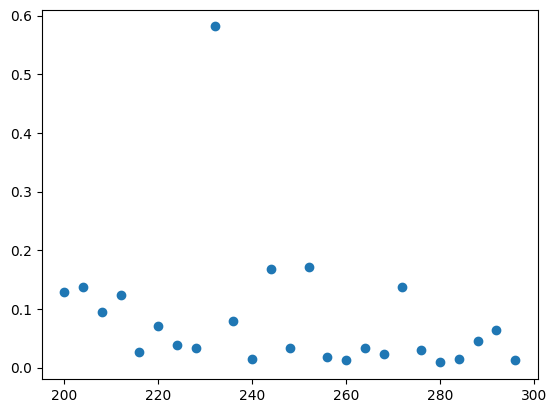

In [232]:
plt.scatter(x = range(200,300,4), y = errors1)

In [231]:
len(errors1)

25

In [185]:
len(range(10,486,4))

119

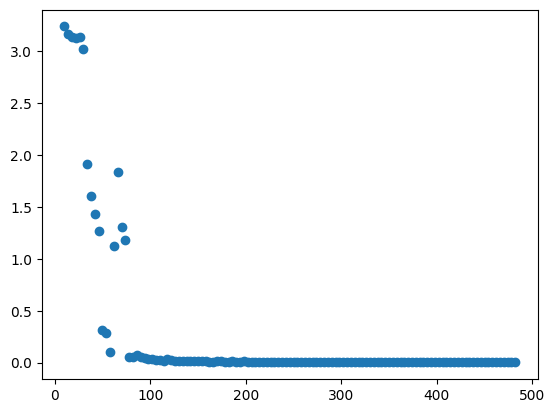

In [186]:
import matplotlib.pyplot as plt
plt.scatter(x = range(10,350,4), y = errors)

In [241]:
from sklearn.decomposition import NMF
#250
nmf_model = NMF(n_components = 306, max_iter = 200,verbose = 2)
W = nmf_model.fit_transform(users_pt)
H = nmf_model.n_components_
H = nmf_model.components_
mat = np.dot(W,H)
model_pt = pd.DataFrame(mat, columns = np.array(users_pt.columns))
model_pt.set_index(np.array(users_pt.index),inplace = True)
# pred = model_pt_train.loc[user_id_hp].values
# 290 338 382

violation: 1.0
violation: 0.00302861881449559
violation: 0.03813192153597762
violation: 0.025398776742627412
violation: 0.021031407170811763
violation: 0.01808442946858898
violation: 0.015647008055965708
violation: 0.013633420824681634
violation: 0.011358374533318389
violation: 0.009717472167877902
violation: 0.008575574409601792
violation: 0.008097307958168097
violation: 0.007692246953120188
violation: 0.007136232187803537
violation: 0.0069675955622263515
violation: 0.006721594274813289
violation: 0.005789256195948193
violation: 0.004567435086737141
violation: 0.003688030370419833
violation: 0.003181615335181399
violation: 0.0028730041432338876
violation: 0.002694587120406752
violation: 0.0025597233805850295
violation: 0.002446355541959122
violation: 0.002351593685968682
violation: 0.0022218781215346942
violation: 0.0020394114000166406
violation: 0.0018157373436307658
violation: 0.0016181833497998384
violation: 0.001453392995382142
violation: 0.0013196213194779742
violation: 0.0012113

In [242]:
model_pt.head(20)

,1984,1st to Die: A Novel,2nd Chance,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Darkness More Than Night,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),...,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)","Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
1424,0.086089,0.110865,0.382229,0.030304,0.263051,0.046914,0.064021,0.000000,0.189917,0.210142,...,0.283040,0.260716,0.000000,0.000616,0.016603,0.009210,0.006556,1.117035,0.057029,0.009440
1733,0.000000,0.035625,0.263480,0.005166,0.506957,0.108978,0.000000,0.000034,0.015381,0.000000,...,0.000414,0.076384,0.125686,0.000000,0.037721,0.006479,0.000078,0.000000,0.001583,0.009692
2033,0.000000,0.000000,0.000000,0.196071,0.749019,0.000000,0.013822,0.029384,0.000599,0.209081,...,0.157027,0.001362,0.000000,0.428538,0.112043,0.276010,0.001024,0.180192,0.008415,0.156008
2110,0.208667,0.047044,0.063178,0.069222,0.164137,0.026351,0.093562,0.001450,0.041965,0.004039,...,0.054155,0.000169,0.001861,0.007897,0.123737,0.166581,0.012167,0.021482,0.351126,0.008440
2276,0.000000,0.300376,2.469695,0.131077,0.191245,0.609464,0.033825,0.050471,0.223045,0.381080,...,0.301800,0.418010,0.085274,0.425702,0.059579,0.130850,0.240415,0.409988,0.000000,0.009878
2766,0.000000,0.009567,0.270280,0.116717,1.392355,0.238253,0.006596,0.000236,0.014985,2.007122,...,0.654024,0.399848,0.002526,0.411338,0.032623,0.606751,0.770172,0.602713,0.124975,0.895381
3363,0.041139,0.049119,0.101600,0.022858,0.214349,0.139513,0.149687,0.271462,0.023882,0.000460,...,0.116423,0.006200,0.144526,0.435719,0.000000,0.051901,0.031298,0.013412,0.119241,0.353418
3757,0.110638,0.000000,0.000000,0.005120,0.107144,0.021026,0.004862,0.005679,0.048113,0.000000,...,0.052327,0.000000,0.000000,0.087713,0.000000,0.006887,0.839023,0.082423,0.208313,0.002652
3827,0.038982,0.030259,0.088887,0.000777,0.006380,0.000175,0.000000,0.179942,0.002615,0.422292,...,0.193718,0.003495,0.133996,0.034853,0.131276,0.148479,0.072232,0.384246,0.301182,0.156635
4017,0.000000,0.009344,0.000000,0.000000,0.140484,0.062734,0.028925,0.000000,0.000000,0.000000,...,0.352894,0.000000,0.000000,0.000000,0.000000,0.000000,0.260664,0.000000,0.055794,0.086665


In [243]:
users_pt.head(20)

Title,1984,1st to Die: A Novel,2nd Chance,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Darkness More Than Night,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),...,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)","Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


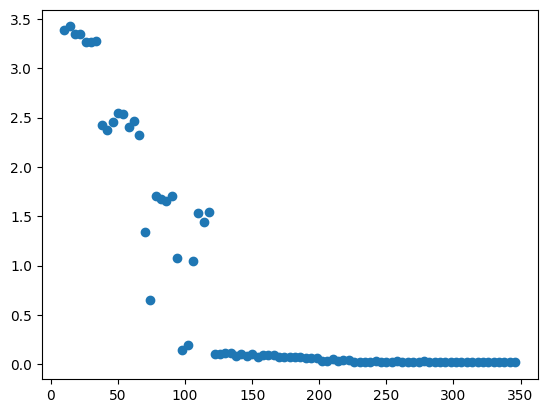

In [233]:
import matplotlib.pyplot as plt
plt.scatter(range(10,350,4), errors)

In [245]:
nmf_model = NMF(n_components = 201, max_iter = 200,verbose = 2)
W = nmf_model.fit_transform(model_pt)
H = nmf_model.n_components_
H = nmf_model.components_
mat = np.dot(W,H)
model_pt_train = pd.DataFrame(mat, columns = np.array(users_pt.columns))
model_pt_train.set_index(np.array(users_pt.index),inplace = True)
pred = model_pt_train.loc[user_id_hp].values
actual = users_pt.loc[user_id_hp]
mse = mean_squared_error(actual,pred)
mse

violation: 1.0
violation: 0.005818446634471308
violation: 0.04118861425453086
violation: 0.02430554047554733
violation: 0.03253867809165122
violation: 0.026072362057816188
violation: 0.02149877594898366
violation: 0.02195175356254616
violation: 0.02427831699586669
violation: 0.019429341647384295
violation: 0.011615720109719152
violation: 0.007753618726677219
violation: 0.0074596687936550445
violation: 0.006051849575916239
violation: 0.004332351905856491
violation: 0.0033313227087781784
violation: 0.0029813407610488067
violation: 0.0028475785878839394
violation: 0.0023271960257533167
violation: 0.0016828177170094018
violation: 0.0012273886309630319
violation: 0.0008732737972536222
violation: 0.0006632103672708342
violation: 0.0005260272415477397
violation: 0.00043169051357187517
violation: 0.0003659726802942657
violation: 0.00031898301981235543
violation: 0.0002807470436020524
violation: 0.00024973948155049725
violation: 0.00022169188243498664
violation: 0.00020052470403993187
violation

0.015989295844561508

In [247]:
model_pt_train.head(10)

,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
254,8.708204,0.048669,0.038611,0.051945,0.158681,0.001708,0.029570,0.154683,1.019127,0.271036,...,0.083152,0.188184,0.106255,0.292069,0.324570,0.101025,0.002125,1.432959,0.001781,0.099001
2276,0.287785,0.102400,3.670426,0.077343,0.238939,0.108903,0.069127,0.004080,0.244553,0.005485,...,0.169504,0.285083,1.149327,0.648723,0.188757,0.485226,0.002611,0.008130,0.026704,0.254400
2766,0.128243,0.013306,1.030430,0.007949,1.352040,0.040833,0.001368,0.020852,0.292733,0.001290,...,0.512318,0.379821,0.418381,0.175912,0.240976,1.089786,0.000578,0.134826,0.022060,0.585946
2977,0.101261,0.000250,0.359478,0.084108,0.189552,0.005658,0.202797,0.005627,0.301374,0.134579,...,0.178896,0.010310,0.002386,0.001837,0.131024,2.121236,0.000649,0.012530,0.266734,0.012883
3363,0.000862,0.000409,0.002420,0.000502,0.003853,0.213305,0.000298,0.000031,0.243421,0.170895,...,0.001109,0.001596,0.000356,0.001663,0.000484,0.126235,0.000290,0.001425,0.000101,0.000515
4017,0.000408,0.000502,0.004259,0.001691,0.053290,0.096157,0.001120,0.092305,0.102054,0.071396,...,0.001063,0.001226,0.000045,0.000128,0.052379,0.056045,0.000948,0.025745,0.059799,0.000854
4385,0.155244,0.007823,0.015452,0.001394,0.102628,0.012166,0.395415,0.001103,0.003088,0.003264,...,0.001667,0.035097,0.042591,0.206257,0.035281,0.002252,0.001349,0.004174,0.036696,0.022154
6251,0.002913,0.000414,0.137129,0.308405,0.723747,0.631630,0.022942,0.001540,0.506262,0.832136,...,0.054904,0.301009,0.156400,0.095803,0.631226,0.740986,0.001632,0.348720,0.442145,0.760592
6323,0.277366,0.222741,0.425218,0.008172,0.122024,0.298238,0.001405,0.022209,0.006532,0.007762,...,0.378328,0.135953,0.003512,0.206546,0.232883,0.126842,0.141472,0.203423,0.003001,0.530742
6543,0.180196,9.345350,1.165150,0.005588,0.014379,0.044846,0.016086,0.179087,0.112183,0.062955,...,0.002601,0.188481,0.010111,0.234605,0.587236,0.429586,0.107706,0.337130,0.043287,0.693583


In [248]:
users_pt.head(10)

Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
model_pt_train.loc[23902]

1984                                                                 0.000011
1st to Die: A Novel                                                  0.000000
2nd Chance                                                           0.000019
4 Blondes                                                            6.948602
A Bend in the Road                                                   0.062934
                                                                       ...   
Year of Wonders                                                      8.143837
You Belong To Me                                                     0.000048
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    0.157719
Zoya                                                                 0.071572
\O\" Is for Outlaw"                                                  0.006037
Name: 23902, Length: 706, dtype: float64

In [257]:
users_pt.loc[23902]

Title
1984                                                                 0.0
1st to Die: A Novel                                                  0.0
2nd Chance                                                           0.0
4 Blondes                                                            7.0
A Bend in the Road                                                   0.0
                                                                    ... 
Year of Wonders                                                      8.0
You Belong To Me                                                     0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    0.0
Zoya                                                                 0.0
\O\" Is for Outlaw"                                                  0.0
Name: 23902, Length: 706, dtype: float64

In [265]:
recomm_df = pd.DataFrame({
    "Title":model_pt_train.loc[235105].index,
    "Prediction" :model_pt_train.loc[235105],
    "Actual" : users_pt.loc[235105]
})

In [266]:
recomm_df[recomm_df["Actual"]!=0.0]

,Title,Prediction,Actual
A Wrinkle In Time,A Wrinkle In Time,9.708853,10.0
A Wrinkle in Time,A Wrinkle in Time,9.800153,10.0
Birthright,Birthright,5.838244,6.0
Bleachers,Bleachers,8.088245,8.0
Body of Lies,Body of Lies,5.754725,6.0
Daddy,Daddy,2.888634,3.0
Easy Prey,Easy Prey,7.686434,8.0
Executive Orders (Jack Ryan Novels),Executive Orders (Jack Ryan Novels),8.171551,8.0
Full House (Janet Evanovich's Full Series),Full House (Janet Evanovich's Full Series),3.718184,4.0
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel),Hard Eight : A Stephanie Plum Novel (A Stephan...,8.746284,9.0


In [267]:
user_sim_model_score = cosine_similarity(model_pt_train)
get_sim_books_model(235105,model_pt_train,user_sim_model_score )

[438 725  21 670 136]


,Recommended_title,Similarity_score(0-1),Weighted_score(1-10)


In [273]:
index = np.where(users_pt.index == 235105)[0][0]  
user_sim_scores = user_sim_score[index]
#print(index)
# Sort similar users based on similarity score and get the top similar users
similar_users = np.argsort(user_sim_score)[::-1][1:6]
print(similar_users)


[[  0 511 512 ... 740 275 808]
 [  0 480 481 ... 106 306 807]
 [404 493 494 ... 357 228 806]
 [809 372 371 ... 247 306 805]
 [  0 473 475 ... 435 680 804]]


In [74]:
import pickle
loaded_model = pickle.load(open("nmf_model.pkl","rb"))
W = loaded_model.transform(users_pt)



violation: 1.0
violation: 0.46556867516985484
violation: 0.1524456283294568
violation: 0.040332793387562495
violation: 0.011536683131367166
violation: 0.0032523938767523926
violation: 0.0009243294399965857
violation: 0.00023712461967681292
violation: 7.566540890249056e-05
Converged at iteration 10


array([[0.        , 0.03203743, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25233135, ..., 0.        , 0.        ,
        0.        ]])

In [75]:
W.shape

(810, 306)

In [77]:
H = loaded_model.components_
H


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46698601, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94280785, 2.11055538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
users_pt.index

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=810)

In [117]:
avg_rating= popular_books[popular_books["Title"] == "Harry Potter and the Chamber of Secrets (Book 2)"]["avg_rating"].sort_values(ascending= False).values[0]
avg_rating


6.6117647058823525

In [119]:
books[books["Title"] == "Classical Mythology"]["Image_URL_M"].values[0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [122]:
rating = ratings_with_name[(ratings_with_name["User-ID"]== 23902) & (ratings_with_name['Title'] == "A Thin Dark Line (Mysteries &amp; Horror)")]["Book-Rating"].sort_values(ascending = False).values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [123]:
ratings_with_name[(ratings_with_name["User-ID"]== model_pt.index[sim_user_index]) & (ratings_with_name['Title'] == book)]["Book-Rating"].values

NameError: name 'model_pt' is not defined